In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle

In [2]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [13.5, 9.]
plt.rcParams['font.size'] = 24.

In [3]:
pickle_dir = 'small_data_pickles'

In [4]:
pickle_data = {
    'dim_key': [],
    'num_steps': [],
    'neuron_layer_sizes': [],
    'loss_function_values': [],
    'accuracy_values': []}

In [5]:
for pickle_file_name in os.listdir(pickle_dir):
    pathname = os.path.join(pickle_dir, pickle_file_name)
    with open(pathname, 'rb') as pickle_file:
        run_dict = pickle.load(pickle_file)
        for key in pickle_data:
            if 'values' in key:
                pickle_data[key].append(run_dict[key][-1])
            else:
                pickle_data[key].append(run_dict[key])

In [6]:
for key in ['num_steps', 'neuron_layer_sizes']:
    first_value = pickle_data[key][0]
    assert pickle_data[key] == [first_value 
                               for _ in pickle_data[key]]

In [7]:
dimension = sum(run_dict['dim_key'])

In [8]:
number_of_layers = len(run_dict['neuron_layer_sizes'])

In [9]:
tuples = [(d[1], acc, loss) for d, acc, loss in zip(
    pickle_data['dim_key'], pickle_data['accuracy_values'],
    pickle_data['loss_function_values'])]

In [10]:
num_fourier, accuracy, loss = [np.array(list(l)) for l in zip(*sorted(tuples))]

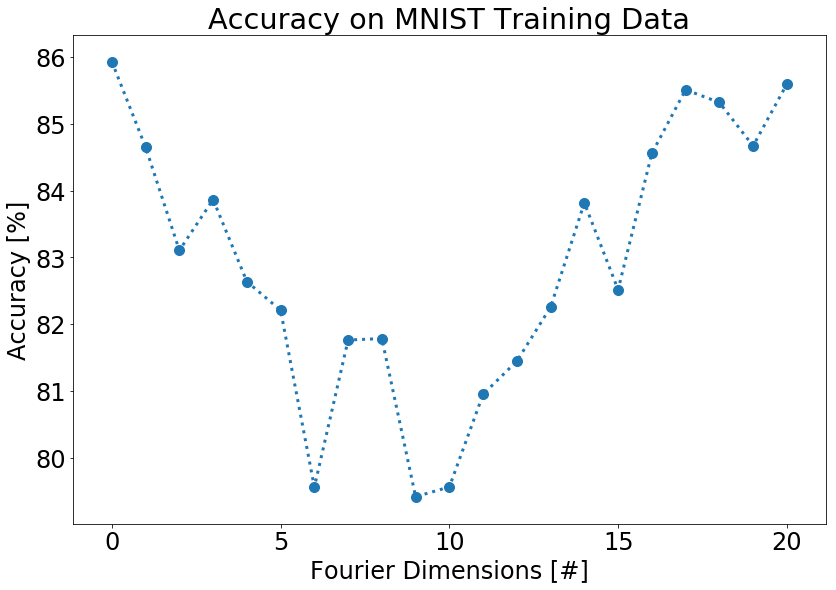

In [11]:
plt.plot(num_fourier, 100. * accuracy, lw = 3, ls = ':')
plt.scatter(num_fourier, 100. * accuracy, s = 100)

plt.xticks([0,5,10,15,20])
plt.xlabel('Fourier Dimensions [#]')
plt.ylabel('Accuracy [%]')
plt.title('Accuracy on MNIST Training Data')

fig_title = (str(dimension) + 'D_' + str(number_of_layers)  + 
             'L-autoencoder-accuracy_data.png')
plt.savefig('plots/' + fig_title)

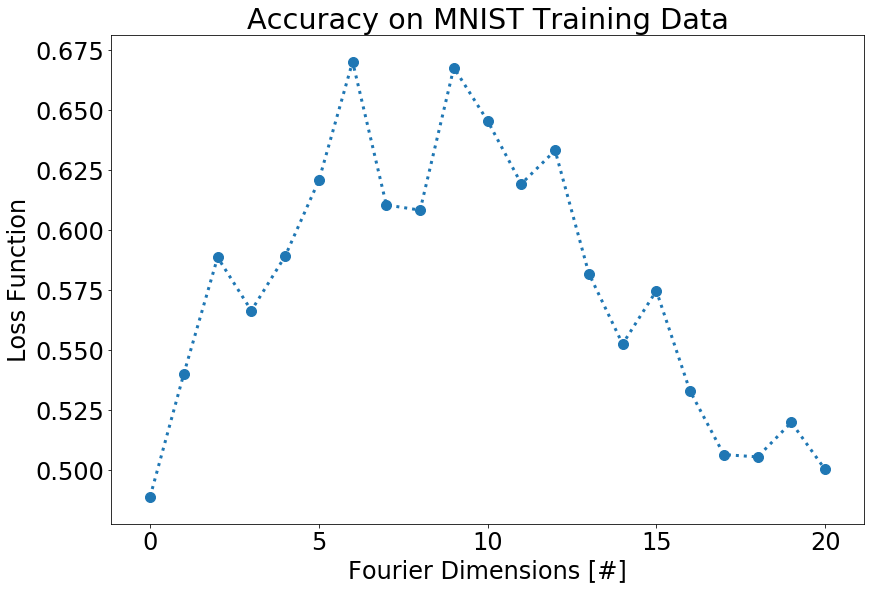

In [12]:
plt.plot(num_fourier, loss, lw = 3, ls = ':')
plt.scatter(num_fourier, loss, s = 100)

plt.xticks([0,5,10,15,20])
plt.xlabel('Fourier Dimensions [#]')
plt.ylabel('Loss Function')
plt.title('Accuracy on MNIST Training Data')

fig_title = (str(dimension) + 'D_' + str(number_of_layers)  + 
             'L-autoencoder-loss_data.png')
plt.savefig('plots/' + fig_title)